In [1]:
from manager import Manager

manager = Manager()

Epochs Processed: 40: 100%|███████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 729.19it/s]


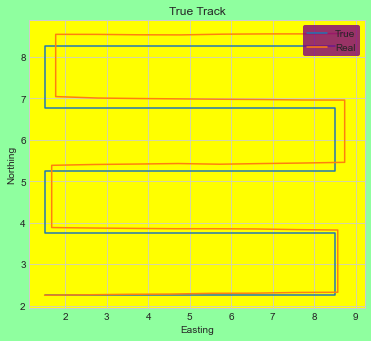

In [2]:
manager.plot_a()

C:\Users\Jan Erik Naess\Anaconda3\envs\capstone\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


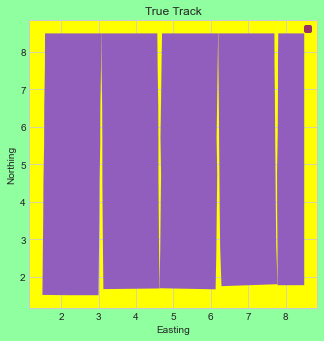

In [3]:
manager.plot_b()

<AxesSubplot:>

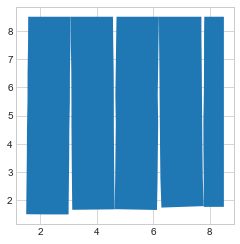

In [4]:
manager.Sim.single_pass.plot(legend=True)

<AxesSubplot:>

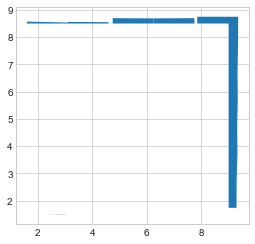

In [4]:
manager.Sim.double_pass.plot()

<AxesSubplot:>

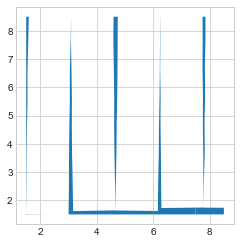

In [5]:
manager.Sim.zero_pass.plot()

<AxesSubplot:>

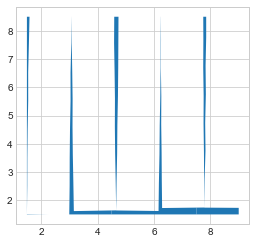

In [6]:
manager.Sim.temp.plot()

<AxesSubplot:>

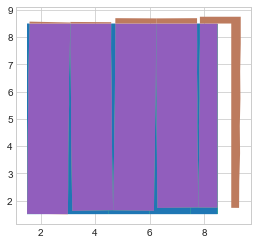

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#manager.Sim.inner.plot(ax=ax)
manager.Sim.inner_gdf.plot(ax=ax, color='#49e37c')
#manager.Sim.temp.plot(ax=ax, color='red')
manager.Sim.zero_pass.plot(ax=ax)
manager.Sim.single_pass.plot(ax=ax, color = '#915ebd')
manager.Sim.double_pass.plot(ax=ax, color = '#bd7b5e')

<AxesSubplot:>

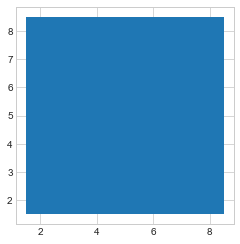

In [8]:
manager.Sim.inner_gdf.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


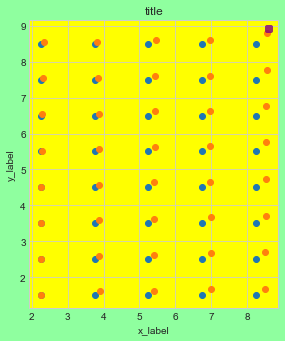

In [9]:
import matplotlib.pyplot as plt

x_label="x_label"
y_label="y_label"
title="title"

fig, ax = plt.subplots()

fig.patch.set_facecolor('xkcd:mint green')


ax.set_ylabel(y_label)
ax.set_xlabel(x_label)
ax.set_title(title)

ax.set_facecolor("yellow")

manager.Sim.T_gdf_pt.plot(ax=ax)
manager.Sim.R_gdf_pt.plot(ax=ax)

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

legend = plt.legend(frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('purple')
frame.set_edgecolor('white')
frame.set_linewidth(0)
        
plt.show()
        

        ##ax.set_aspect('equal')

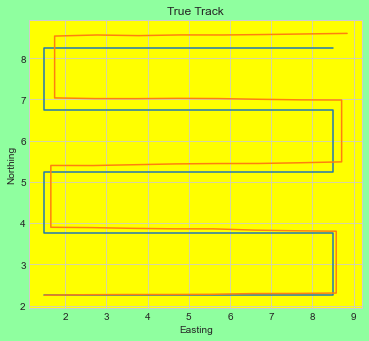

In [123]:
from manager import Manager

manager = Manager()
sim = manager.Sim
df = sim.output_tracks

20